# sklearn中的SVM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# 边界绘制函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

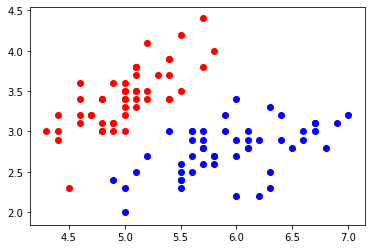

In [3]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

x = x[y<2, :2]
y = y[y<2]

plt.scatter(x[y==0, 0], x[y==0, 1], color="red")
plt.scatter(x[y==1, 0], x[y==1, 1], color="blue")
plt.show()

## step1：对数据进行归一化处理

In [4]:
from sklearn.preprocessing import StandardScaler

stand_scacler = StandardScaler()
stand_scacler.fit(x)
std_x = stand_scacler.transform(x)

## step2：使用SVM进行分类

### hard margin SVM

In [5]:
from sklearn.svm import LinearSVC # C指classifier

svc = LinearSVC(C=1e9) # C非常大时，相当于一个hard margin
svc.fit(std_x, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


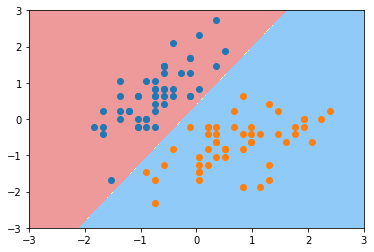

In [6]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(std_x[y==0, 0], std_x[y==0, 1])
plt.scatter(std_x[y==1, 0], std_x[y==1, 1])
plt.show()

In [7]:
svc.coef_

array([[ 4.03243097, -2.50698619]])

In [8]:
svc.intercept_

array([0.92734228])

In [9]:
# 边界绘制函数
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)
    
    # 绘制margin范围
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0 / w1 * x0 - b / w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b / w[1] + 1 / w[1]
    dn_y = -w[0] / w[1] * plot_x - b / w[1] - 1 / w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    dn_index = (dn_y >= axis[2]) & (dn_y <= axis[3])

    plt.plot(plot_x[up_index], up_y[up_index], color = "black")
    plt.plot(plot_x[dn_index], dn_y[dn_index], color = "black")    

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


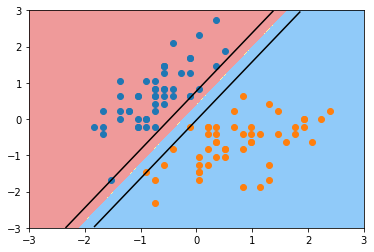

In [10]:
# hard margin svm 范围绘制
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(std_x[y==0, 0], std_x[y==0, 1])
plt.scatter(std_x[y==1, 0], std_x[y==1, 1])
plt.show()

### soft margin SVM

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


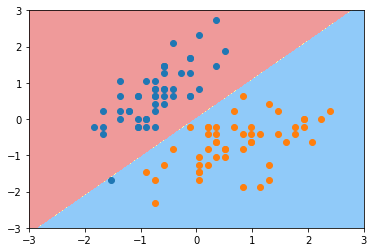

In [11]:
svc_soft = LinearSVC(C=0.01) # C非常小时，相当于一个soft margin
svc_soft.fit(std_x, y)
plot_decision_boundary(svc_soft, axis=[-3,3,-3,3])
plt.scatter(std_x[y==0, 0], std_x[y==0, 1])
plt.scatter(std_x[y==1, 0], std_x[y==1, 1])
plt.show()

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


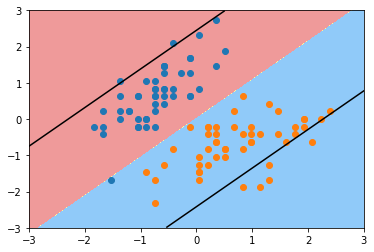

In [12]:
# 当C很小时，soft margin svm范围绘制
plot_svc_decision_boundary(svc_soft, axis=[-3,3,-3,3])
plt.scatter(std_x[y==0, 0], std_x[y==0, 1])
plt.scatter(std_x[y==1, 0], std_x[y==1, 1])
plt.show()